#  <u>*Final Task : Pepper Pirate Paradise Ltd. Analysis .*</u>

## <u>*Analysis objective*</u>
### <u>*To predict and forecast the selling prices of Bell Peppers of different colors (green, red, yellow)*</u>

#### *Importing essintial Libraries*

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs
%matplotlib inline 
init_notebook_mode(connected=True)

## *A.* <u>*Importing data*</u>

In [3]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\actual_data.csv")
df.head()

,week_start_dt,week_end_dt,vietnam_season,p_color,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,jordan_max_price,jordan_min_price,demand,supply
0,2015-08-17,2015-08-23,1,yellow,7.249725,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.425,7.025,0.5,0.5
1,2015-08-17,2015-08-23,1,red,7.600215,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,8.125,7.825,0.5,0.5
2,2015-08-17,2015-08-23,1,green,7.074805,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.525,7.225,0.5,0.5
3,2015-08-24,2015-08-30,1,green,7.025085,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.425,7.225,0.5,0.5
4,2015-08-24,2015-08-30,1,red,7.722255,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,8.125,7.825,0.5,0.5


In [4]:
df2=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\projection_outside_supply.csv")
df2

,week_end_dt,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
0,2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,False,False,True,False,2464051.7
1,2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,False,False,True,False,2390304.2
2,2023-10-22,10961.5,0,2555267.6,0.0,15187.1,False,False,True,False,2581416.4
3,2023-10-29,9211.5,0,2530537.9,0.0,15187.1,False,False,True,False,2554936.6


## *B.* <u>*Data shape*</u>

In [5]:
df.shape

(1272, 19)

In [6]:
df2.shape

(4, 11)

## *C.* <u>*Data info*</u>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_start_dt     1272 non-null   object 
 1   week_end_dt       1272 non-null   object 
 2   vietnam_season    1272 non-null   int64  
 3   p_color           1272 non-null   object 
 4   price             1272 non-null   float64
 5   total_volume      1272 non-null   float64
 6   brazil            1272 non-null   float64
 7   india             1272 non-null   float64
 8   vietnam           1272 non-null   float64
 9   indonesia         1272 non-null   float64
 10  china             1272 non-null   float64
 11  brazil_season     1272 non-null   bool   
 12  indonesia_season  1272 non-null   bool   
 13  india_season      1272 non-null   bool   
 14  china_season      1272 non-null   bool   
 15  jordan_max_price  1241 non-null   float64
 16  jordan_min_price  1241 non-null   float64


---

##  *D.* <u>*Data Cleaning*</u>

### *D.1 na-values*
*for the Null values in the features (jordan_max_price & jordan_min_price) we decided to replace it using the interpolation function as below*

In [8]:
df.interpolate(method="linear",inplace=True,limit_direction="backward")

*Considered the 1st 56 rows as null values and drop it from the model as the numbers of volums are not helpfull*

In [9]:
df.drop(index=df.index[0:57],axis=0,inplace=True)

---

## *E.* <U>*EDA*</U>

*Fom the below table We can notice that :*<br>
*1. the price,total_volume,vietnam mean and median are almos the same -->normaly distributed*<br>
*2. jordan_max_price & jordan_min_price are little right skeweded*<br>
*3. other numeric features are highly right skeweded*

In [10]:
pd.DataFrame(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
vietnam_season,1215.0,1.918519e+00,0.770616,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
price,1215.0,8.008801e+00,1.367471,6.299625,7.000047e+00,7.600120e+00,8.600505e+00,1.408459e+01
total_volume,1215.0,2.244701e+06,482013.003283,325471.000000,1.938246e+06,2.254902e+06,2.541123e+06,3.555979e+06
brazil,1215.0,2.453030e+05,238532.956065,0.000000,1.060860e+04,1.754931e+05,4.435506e+05,8.776478e+05
india,1215.0,2.874410e+04,55904.812350,0.000000,0.000000e+00,0.000000e+00,3.102260e+04,3.489974e+05
vietnam,1215.0,1.806530e+06,573830.707115,220121.500000,1.402234e+06,1.785219e+06,2.204095e+06,3.549175e+06
indonesia,1215.0,1.549481e+05,243242.278078,0.000000,0.000000e+00,2.150300e+03,2.784692e+05,1.061051e+06
china,1215.0,8.487645e+03,21366.041220,0.000000,0.000000e+00,0.000000e+00,7.257400e+03,2.109202e+05
jordan_max_price,1215.0,8.509403e+00,1.494271,6.225000,7.425000e+00,8.025000e+00,9.225000e+00,1.422500e+01
jordan_min_price,1215.0,7.926667e+00,1.367845,6.025000,6.925000e+00,7.525000e+00,8.525000e+00,1.372500e+01


*Mean Price over years "p_color" feature*

In [11]:
for col in df:
    if col in ["week_end_dt"]:
        df[col]=pd.to_datetime(df[col])
        df["year"]=df[col].dt.year
        df["month"]=df[col].dt.month
        df["week"]=df[col].dt.strftime('%U').astype(int) + 1

*1*

In [12]:
pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0)

year,2016,2017,2018,2019,2020,2021,2022,2023
p_color,,,,,,,,
green,6.961827,7.648627,6.989052,7.591270,6.785126,6.982395,7.732820,6.962630
red,7.631681,8.652293,7.711202,8.325247,7.178891,7.457629,8.500397,7.495846
yellow,8.612679,9.790707,8.313073,9.006849,8.237391,8.948136,9.710339,8.758655


*2*

In [19]:
pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0).pct_change(axis=1)

year,2016,2017,2018,2019,2020,2021,2022,2023
p_color,,,,,,,,
green,NaN,0.098652,-0.086234,0.086166,-0.106194,0.029074,0.107474,-0.099600
red,NaN,0.133734,-0.108768,0.079630,-0.137696,0.038827,0.139826,-0.118177
yellow,NaN,0.136778,-0.150922,0.083456,-0.085430,0.086283,0.085180,-0.098007


*3*

In [20]:
(pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0).pct_change(axis=1)).mean(axis=1)

p_color
green     0.004191
red       0.003911
yellow    0.008191
dtype: float64

<u>*Notes:*</u><br>
*  *Clearly we can see that the price mean for each color has changed over years ;*<br>
*  *In 2017,2019,2021 & 2022 the price mean has increased compared to the previous year*<br>
*  *In 2018,2020 & 2023 the price mean has decreased compared to the previous year*<br>
*  *If we looked at the change mean ,will find that for green :.0042 , red : 0.004,and for yellow :.0082*<br>
*  *The mean price percnetage change almost the same for the green and red, ang higher for yellow*<br>
*  *This may be due to affordable price for green and red compared to yellow*

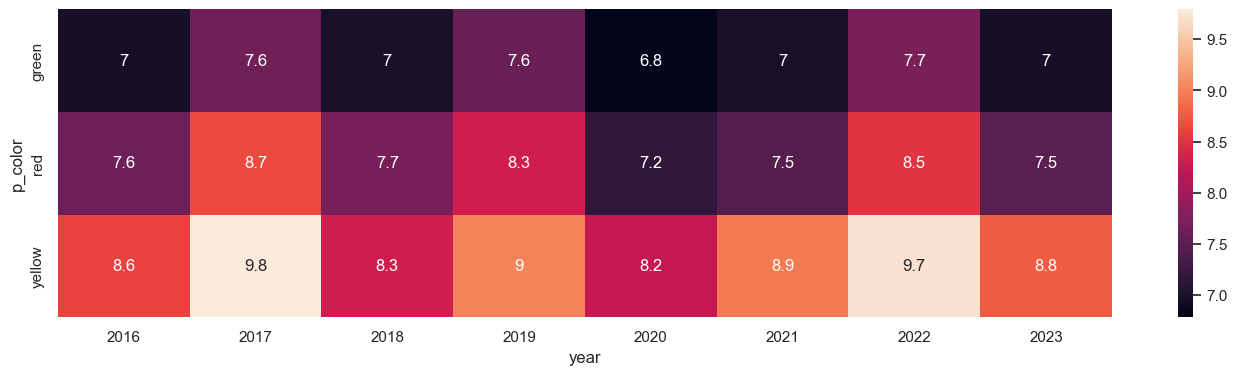

In [50]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0),annot=True);

<Axes: xlabel='year'>

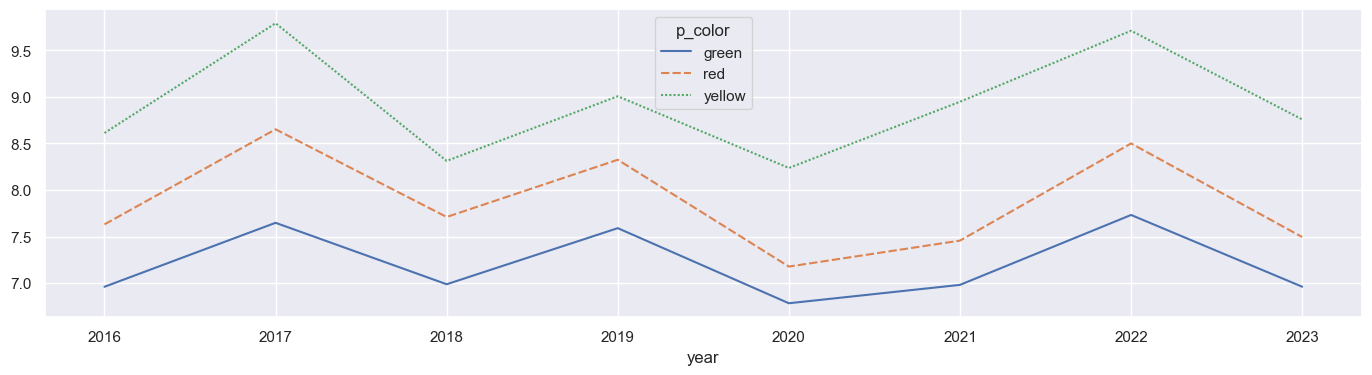

In [51]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.lineplot(data=pd.pivot_table(data=df,index="year",columns="p_color",values="price",aggfunc="mean",fill_value=0))

*Mean Price over years "vietnam_season" feature*

In [27]:
pd.pivot_table(data=df,index="vietnam_season",columns="year",values="price",aggfunc="mean",fill_value=0)

year,2016,2017,2018,2019,2020,2021,2022,2023
vietnam_season,,,,,,,,
1,8.461868,9.850618,8.123501,9.302272,7.379042,8.214851,8.635830,8.366485
2,7.603692,7.820821,7.342067,7.132924,7.158987,7.475666,7.809326,7.036705
3,7.008277,8.739437,7.636358,8.828672,7.820225,7.768094,10.082618,7.458803


In [21]:
pd.pivot_table(data=df,index="vietnam_season",columns="year",values="price",aggfunc="mean",fill_value=0).pct_change(axis=1)

year,2016,2017,2018,2019,2020,2021,2022,2023
vietnam_season,,,,,,,,
1,NaN,0.164119,-0.175331,0.145106,-0.206748,0.113268,0.051246,-0.031189
2,NaN,0.028556,-0.061215,-0.028486,0.003654,0.044235,0.044633,-0.098936
3,NaN,0.247016,-0.126219,0.156136,-0.114224,-0.006666,0.297953,-0.260231


<u>*Notes:*</u><br>
*  *Clearly we can see that season _1_ has the highest price mean compared with othr seasons*<br>
*The price mean for each season over years in total :*<br>

*1. season 1: 8.541808*<br>
*2. season 2: 7.422524*<br>
*3. season 3: 8.167810*<br>

*  *Clearly we can see that the price mean for each color has changed over years ;*<br>
*  *In 2022 the price mean has increased compared to the previous year for for all seasons*<br>
*  *In 2018 the price mean has decreased compared to the previous year for for all seasons*<br>
*  *In 2018,2020 & 2023 the price mean has decreased compared to the previos year*<br>
*  *If we looked at the change mean ,will find that for green :.0042 , red : 0.004,and for yellow :.0082*<br>
*  *The mean price percnetage change almost the same for the green and red, and higher for yellow*<br>
*  *This may be due to affordable price for green and red compared to yellow*

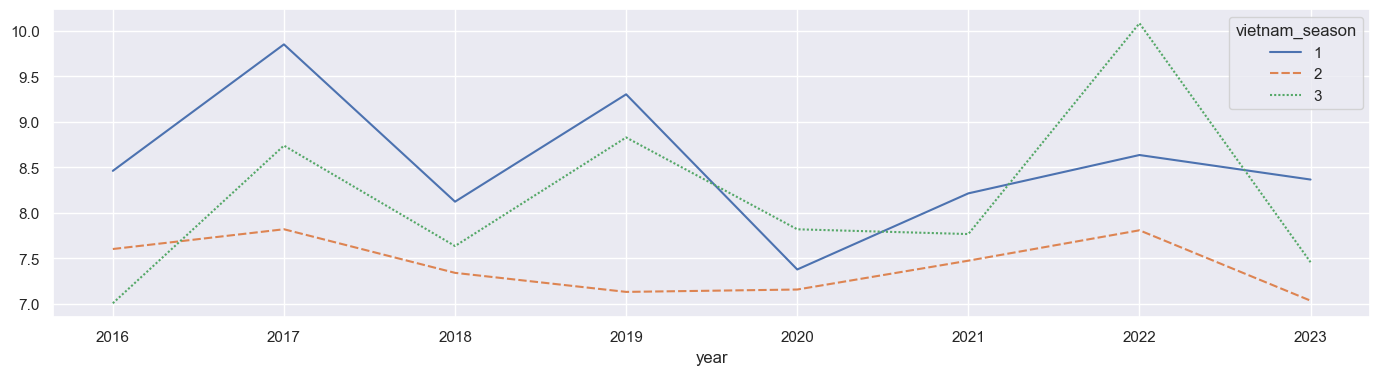

In [53]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.lineplot(pd.pivot_table(data=df,index="year",columns="vietnam_season",values="price",aggfunc="mean",fill_value=0));

*Mean Price over years "vietnam_season & month" features*

In [54]:
pd.pivot_table(data=df,index=["vietnam_season","month"],columns="year",values="price",aggfunc="mean",fill_value=0)

year                      2016       2017      2018       2019      2020  \
vietnam_season month                                                       
1              6      8.199191   8.746291  7.481107  11.657056  7.529207   
               7      8.407738   8.757917  8.042950   9.594335  7.418655   
               8      7.734917  10.577989  9.173488   8.586846  7.428109   
               9      9.273130  11.202973  7.749500   8.088309  7.193503   
               10     9.183295  10.308202  0.000000   7.646403  7.116757   
2              1      7.003525   7.407764  7.461562   7.129695  7.262473   
               2      6.843630   7.921179  7.464104   7.106813  7.965575   
               3      6.741365   8.552002  7.371915   7.285070  8.241483   
               10     9.643770   8.494038  7.326880   7.267351  6.963328   
               11     7.518617   7.244884  7.419446   7.009460  6.696623   
               12     7.374542   7.929532  7.093121   7.144081  6.702988   
3              3      6.719142   8.405478  7.534496   7.776338  8.083377   
               4      6.667256   8.864258  7.865533   9.239527  7.821783   
               5      7.317213   8.877065  7.479977   9.224354  7.608457   
               6      7.695085   8.566692  7.421593   9.811860  0.000000   

year                      2021       2022      2023  
vietnam_season month                                 
1              6      7.530713  11.177820  8.309499  
               7      8.195907   8.883393  9.001657  
               8      8.541837   7.818895  8.602208  
               9      8.495922   7.562479  7.560483  
               10     7.583823   7.333183  7.642700  
2              1      6.872300   8.614308  6.980130  
               2      7.015810   8.808210  7.062413  
               3      0.000000   9.183370  7.216752  
               10     7.670080   7.166592  0.000000  
               11     7.779031   6.981335  0.000000  
               12     8.191952   6.931427  0.000000  
3              3      7.984408   8.875006  7.472257  
               4      7.798806  10.149897  7.476652  
               5      7.605067  10.629921  7.384368  
               6      7.595123  10.699830  7.626942

<u>*Notes:*</u><br>
*  *Clearly we can see that*<br>
1. *season _1_ is considerd in the months 6,7,8,9 & 10*<br>
2. *season _2_ is considerd in the months 1,2,3,10,11 & 12*<br>
3. *season _3_ is considerd in the months 3,4,5 & 6*<br>
4. *The month 10 is common between season 1 and 2*<br>
5. *The month 6 is common between season 1 and 3*<br>
6. *The month 3 is common between season 2 and 3*<br>

* *Based on what we observed above ; we can say that the seasons are divided based on the weather conditions as below :*<br> 
1. *season _1_ in the very summar*<br>
2. *season _2_ in the very winter*<br>
3. *season _3_ in Fair weather*

* *Now we can understand that when we are in the very summer months (season 1) price mean is the highest due to the weather status*<br>
*also it's the lowest in the very winter months (season 2)*<br>
* *Weather impact on peppers :*<br>
*Peppers thrive when temperatures are warm. Being sensitive to the cold, planting should be delayed until the danger of frost is past in the spring. Ideal temperatures are 70°F to 80°F during the day, and 60°F to 70° F at night*<br>
*If you wantto read about this in details click on the [link ](https://www.canr.msu.edu/resources/how_to_grow_peppers_part_2#:~:text=Ideal%20temperatures%20are%2070%C2%B0,often%20results%20in%20blossom%20drop.)**

*Mean Price over years "for country seasson except veitnam" features*

In [55]:
pd.pivot_table(data=df,index=["indonesia_season","india_season","china_season","brazil_season"],columns="year",
               values="price",aggfunc="mean",fill_value=0)

year                                                          2016       2017  \
indonesia_season india_season china_season brazil_season                        
False            False        False        False          7.088741   7.778144   
                                           True           7.028343   8.869950   
                 True         False        False          9.551675   8.856871   
                              True         False          9.273130  11.202973   
True             False        True         True           8.259039   8.732794   
                 True         True         True           7.734917  10.577989   

year                                                          2018       2019  \
indonesia_season india_season china_season brazil_season                        
False            False        False        False          7.372450   7.231577   
                                           True           7.694174   9.231940   
                 True         False        False          7.326880   7.362114   
                              True         False          7.749500   8.088309   
True             False        True         True           7.786629  10.535269   
                 True         True         True           9.173488   8.586846   

year                                                          2020      2021  \
indonesia_season india_season china_season brazil_season                       
False            False        False        False          7.353739  7.535538   
                                           True           7.703269  7.691173   
                 True         False        False          7.001685  7.652829   
                              True         False          7.193503  8.495922   
True             False        True         True           7.473931  7.871361   
                 True         True         True           7.428109  8.541837   

year                                                           2022      2023  
indonesia_season india_season china_season brazil_season                       
False            False        False        False           8.083991  7.137217  
                                           True           10.416577  7.435637  
                 True         False        False           7.199910  7.642700  
                              True         False           7.562479  7.560483  
True             False        True         True            9.850028  8.618191  
                 True         True         True            7.818895  8.602208

---

## *F. <u>Data Transformation*</u>

*Transform the feature "vietnam_season" to str in order to apply one hot encoding later*

In [29]:
df["vietnam_season"]=df["vietnam_season"].astype("str")

*Replacing the values [True,Fales] with 1,0 ,where 1 is True & 0 is False*

In [30]:
for col in df:
    if col in ["brazil_season","indonesia_season","india_season","china_season"]:
        df[col]=df[col].apply(lambda x:1 if x is True else 0)

*Applying one hot encoding the the features ["vietnam_season","p_color"]:*

In [31]:
for col in df:
    if col in ["vietnam_season","p_color"]:        
        one_hot_encoded_data = pd.get_dummies(df[col])
        one_hot_encoded_data=one_hot_encoded_data.applymap(lambda x:1 if x is True else 0 )
        df=pd.concat([df.drop([col],axis=1),one_hot_encoded_data],axis=1)
        df.rename(columns={"1":"vietnam_season_1","2":"vietnam_season_2","3":"vietnam_season_3"},inplace=True)

In [32]:
from datetime import datetime,timedelta
future_date_index=pd.date_range(start="2023-10-08",end="2023-10-29",freq="W")
future_date=pd.DataFrame({"date":future_date_index}).set_index("date")

*Concatenate the two data sets in one*

In [33]:
df=pd.concat([df,df2],axis=0)
df

,week_start_dt,week_end_dt,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,...,jordan_max_price,jordan_min_price,demand,supply,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow
57,2015-12-28,2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,...,6.625,6.325,0.50,0.500000,0.0,1.0,0.0,1.0,0.0,0.0
58,2015-12-28,2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,...,7.525,7.125,0.51,0.500000,0.0,1.0,0.0,0.0,1.0,0.0
59,2015-12-28,2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,...,7.425,7.025,16.55,0.500000,0.0,1.0,0.0,0.0,0.0,1.0
60,2016-01-04,2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,...,7.525,7.025,271.16,0.500000,0.0,1.0,0.0,0.0,0.0,1.0
61,2016-01-04,2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,...,7.625,7.125,42.33,0.500000,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2023-09-25,2023-10-01,8.758362,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,...,9.625,8.825,409.19,196.703982,1.0,0.0,0.0,0.0,0.0,1.0
0,NaN,2023-10-08,NaN,2464051.7,62609.9,0.0,2365023.5,27739.8,8678.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2023-10-15,NaN,2390304.2,22744.0,0.0,2345998.8,15052.6,6508.7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2023-10-22,NaN,2581416.4,10961.5,0.0,2555267.6,0.0,15187.1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Droppring the feature "week_start_dt"*

In [34]:
df.drop('week_start_dt',axis=1,inplace=True)

*Transform the feature "week_end_dt" to date type and extract Year,Month*

In [35]:
for col in df:
    if col in ["week_end_dt"]:
        df[col]=pd.to_datetime(df[col])
        df["year"]=df[col].dt.year
        df["month"]=df[col].dt.month

*Set the Feature "week_end_dt" as index*

In [36]:
df.set_index("week_end_dt",inplace=True)

In [37]:
df

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,demand,supply,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow,year,month
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.50,0.500000,0.0,1.0,0.0,1.0,0.0,0.0,2016,1
2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.51,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,2016,1
2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,16.55,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,2016,1
2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,271.16,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,2016,1
2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,42.33,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,8.758362,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,0,1,...,409.19,196.703982,1.0,0.0,0.0,0.0,0.0,1.0,2023,10
2023-10-08,NaN,2464051.7,62609.9,0.0,2365023.5,27739.8,8678.3,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,10
2023-10-15,NaN,2390304.2,22744.0,0.0,2345998.8,15052.6,6508.7,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,10


*Replace the new null values with the 0*

In [38]:
df.fillna(0,inplace=True)

In [39]:
df

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,demand,supply,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow,year,month
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.50,0.500000,0.0,1.0,0.0,1.0,0.0,0.0,2016,1
2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.51,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,2016,1
2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,16.55,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,2016,1
2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,271.16,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,2016,1
2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,42.33,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,8.758362,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,0,1,...,409.19,196.703982,1.0,0.0,0.0,0.0,0.0,1.0,2023,10
2023-10-08,0.000000,2464051.7,62609.9,0.0,2365023.5,27739.8,8678.3,0,0,1,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2023,10
2023-10-15,0.000000,2390304.2,22744.0,0.0,2345998.8,15052.6,6508.7,0,0,1,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2023,10
